# time_serie_visualizer
. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime as dt

### Use Pandas to import the data from "fcc-forum-pageviews.csv". 
- Set the index to the date column + convert date col in datetime 

In [11]:
#%%timeit
# ONE Sentence -> import data + set date col as index + mk index a datetime type
df1 = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
# display(df1)
# df1.info(), df1.index

In [12]:
#%%timeit
# THREE Sentence -> import data + set date col as index + mk index a datetime type
df2 = pd.read_csv('fcc-forum-pageviews.csv')
# df2.index = df2.date
# df2.drop(labels=['date'], axis=1, inplace=True)
df2.set_index('date', inplace=True)
df2.index = pd.to_datetime(df2.index)
# display(df2)
# df2.index

In [16]:
#%%timeit
df1 = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])
display(df1)
df1.info(), df1.index

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


(None,
 DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
                '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
                '2016-05-17', '2016-05-18',
                ...
                '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
                '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
                '2019-12-02', '2019-12-03'],
               dtype='datetime64[ns]', name='date', length=1304, freq=None))

In [17]:
# (jm-test) change this simple df to a Series
S = df1['value']
display(S), type(S)
# Could be a diff manipulating the data as a serie instead of a DF ¿?

date
2016-05-09      1201
2016-05-10      2329
2016-05-11      1716
2016-05-12     10539
2016-05-13      6933
               ...  
2019-11-29    171584
2019-11-30    141161
2019-12-01    142918
2019-12-02    220144
2019-12-03    158549
Name: value, Length: 1304, dtype: int64

(None, pandas.core.series.Series)

### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [18]:
df1.describe(), df1.value.min(), df1.value.max()

(              value
 count  1.304000e+03
 mean   6.722068e+04
 std    5.933964e+04
 min    1.201000e+03
 25%    3.575775e+04
 50%    5.719750e+04
 75%    8.388300e+04
 max    1.173655e+06,
 1201,
 1173655)

In [19]:
#df = df.drop(df.loc[df['value'] < df['value'].quantile(0.025)])
df1.loc[df1['value'] == df1['value'].min()]
#df1.drop(df1.loc[df1['value'] == df1['value'].min()])

,value
date,
2016-05-09,1201


In [20]:
df_drop = df1.drop(df1.loc[(df1['value'] <= df1['value'].quantile(0.025)) |
                      (df1['value'] >= df1['value'].quantile(0.975))].index)
df_drop

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [21]:
df = df1.loc[(df1['value'] > df1['value'].quantile(0.025)) &
             (df1['value'] < df1['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [22]:
df_query = df1.query(
    "value < value.quantile(0.975) & value > value.quantile(0.025)")
df_query

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [23]:
df_f2 = df1[(df1['value'] > df1['value'].quantile(0.025)) &
            (df1['value'] < df1['value'].quantile(0.975))]
df_f2

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Create a draw_line_plot function that uses Matplotlib to draw a line chart:
- similar to "examples/Figure_1.png". 
- The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
- The label on the x axis should be Date and the label on the y axis should be Page Views.

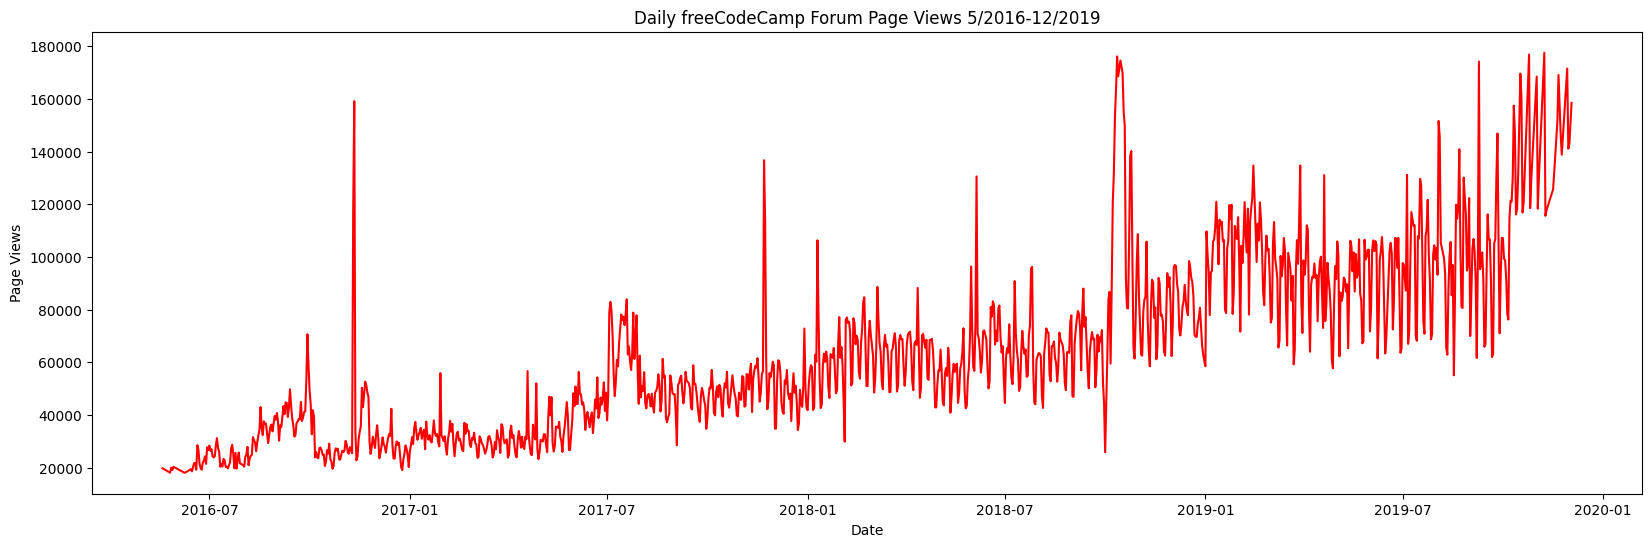

In [24]:
fig, ax = plt.subplots(figsize= (20, 6))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.plot(df, color='red')

In [25]:
type(fig)

matplotlib.figure.Figure